In [179]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [180]:
z_h = 100
z_0hi = 0.92
u_star = 0.29
k = 0.4
z_0lo = 0.0001
beta = 0.68
D = 100
delta_ibl_0 = z_h

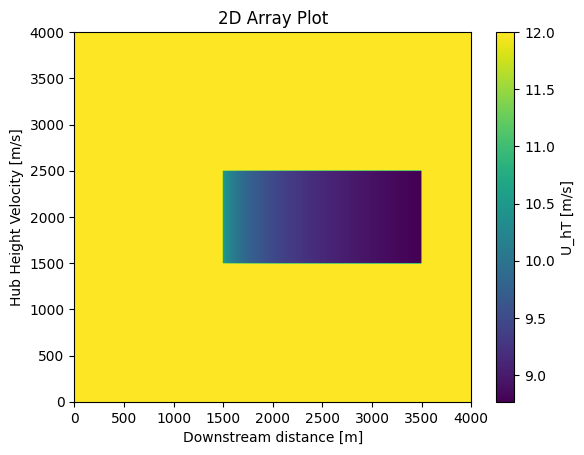

In [181]:
x = np.linspace(0, 2000, 2000)

delta_ibl_x = delta_ibl_0 + z_0hi * (x/z_0hi)**(4/5)
U_hT_x = (u_star / k) * (np.log(delta_ibl_x / z_0lo) / np.log(delta_ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)

array_2d = np.zeros((4000, 4000))

x_start = 1500
y_start = 1500

for i in range(4000):
    for j in range(4000):
        array_2d[i][j] = 12

for i in range(len(U_hT_x)):
    array_2d[y_start:y_start + 1000, x_start + i] = U_hT_x[i]

# Set labels and title
plt.imshow(array_2d, aspect='auto', origin='lower')
plt.colorbar(label='U_hT [m/s]')
plt.xlabel('Downstream distance [m]')
plt.xlim(0, 4000)
plt.ylabel('Hub Height Velocity [m/s]')
plt.ylim(0, 4000)
plt.title('2D Array Plot')
plt.show()